In [1]:
# Part 1: Understanding Optimization Algorithms

# Q1: What is the role of optimization algorithms in artificial neural networks? Why are they necessary?

# Optimization algorithms in artificial neural networks play a crucial role in training the network by adjusting its parameters (weights and biases) to minimize a defined loss function. They are necessary because training a neural network involves finding the optimal set of parameters that can make accurate predictions on the given data. Optimization algorithms automate the process of parameter tuning by iteratively updating them to minimize the loss, effectively guiding the network towards a solution.

# Q2: Explain the concept of gradient descent and its variants. Discuss their differences and tradeoffs in terms of convergence speed and memory requirements.

# Gradient descent is an optimization algorithm used to minimize the loss function by iteratively adjusting model parameters in the direction of the steepest gradient. Variants of gradient descent include:
# Batch Gradient Descent: Updates parameters using the average gradient over the entire dataset in each iteration. It can have high memory requirements but usually converges to a precise solution.
# Stochastic Gradient Descent (SGD): Updates parameters using the gradient for a single randomly chosen data point in each iteration. It has lower memory requirements but can have noisy convergence.
# Mini-Batch Gradient Descent: A compromise between batch and SGD, it updates parameters using a small, randomly chosen subset (mini-batch) of the data in each iteration. It balances memory requirements and convergence speed.

# Q3: Describe the challenges associated with traditional gradient descent optimization methods (e.g., slow convergence, local minima). How do modern optimizers address these challenges?

# Challenges of traditional gradient descent:
# Slow convergence: Traditional GD methods can converge slowly, especially in deep networks.
# Local minima: They may get stuck in local minima, failing to find the global minimum.
# Modern optimizers address these challenges by introducing enhancements such as momentum, adaptive learning rates, and methods to escape local minima. These optimizations improve convergence speed and stability, making them more suitable for deep learning.

# Q4: Discuss the concepts of momentum and learning rate in the context of optimization algorithms. How do they impact convergence and model performance?

# Momentum: Momentum is a hyperparameter that introduces inertia in the optimization process. It helps the optimizer overcome oscillations and speed up convergence by taking into account the exponentially weighted average of past gradients.
# Learning Rate: Learning rate is another hyperparameter that determines the step size in each parameter update. It influences the trade-off between convergence speed and stability. A too-high learning rate may lead to divergence, while a too-low rate may lead to slow convergence.

# Part 2: Optimizer Techniques

# Q1: Explain the concept of Stochastic Gradient Descent (SGD) and its advantages compared to traditional gradient descent. Discuss its limitations and scenarios where it is most suitable.

# SGD updates model parameters using a single randomly chosen data point in each iteration. Advantages include faster convergence and lower memory requirements. Limitations include noisy convergence and sensitivity to the learning rate. It is suitable for large datasets and when fast convergence is required.

# Q2: Describe the concept of Adam optimizer and how it combines momentum and adaptive learning rates. Discuss its benefits and potential drawbacks.

# Adam optimizer combines momentum and adaptive learning rates. It maintains two moving averages of past gradients, enabling faster convergence. Benefits include robustness to various learning rates and faster convergence. Drawbacks may include sensitivity to hyperparameters and potentially overshooting the minimum.

# Q3: Explain the concept of RMSprop optimizer and how it addresses the challenges of adaptive learning rates. Compare it with Adam and discuss their relative strengths and weaknesses.

# RMSprop optimizer adapts the learning rate based on the root mean square of past gradients for each parameter. It addresses the issue of vanishing/exploding gradients. RMSprop is less computationally intensive than Adam but may converge slower. Adam has momentum and can adapt learning rates differently for each parameter.

# Part 3: Applying Optimizers

# Q1: Implement SGD, Adam, and RMSprop optimizers in a deep learning model using a framework of your choice. Train the model on a suitable dataset and compare their impact on model convergence and performance.

# see below cell
# Q2: Discuss the considerations and tradeoffs when choosing the appropriate optimizer for a given neural network architecture and task. Consider factors such as convergence speed, stability, and generalization performance.

# When selecting an optimizer, consider the dataset size, model architecture, and task. For example:
# Adam and RMSprop may converge faster but require more memory.
# SGD with learning rate schedules can be useful for fine-tuning.
# It's essential to tune hyperparameters like learning rate, momentum, and batch size to optimize performance.
# Ensure you provide code, explanations, and results in your Jupyter Notebook to support your answers and implementations.

2023-09-30 14:08:35.886272: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 14:08:35.954034: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-09-30 14:08:35.954099: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-09-30 14:08:35.954131: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-30 14:08:35.963516: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-30 14:08:35.964756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

11490434/11490434 [==============================] - 2s 0us/step


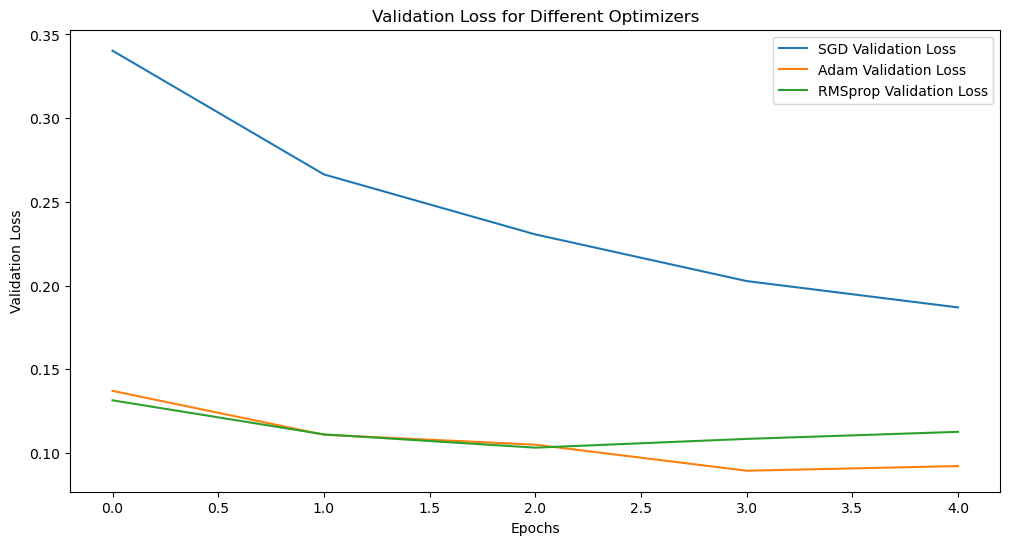

SGD Test Loss: 0.19110780954360962, Test Accuracy: 0.9431999921798706
Adam Test Loss: 0.08360140025615692, Test Accuracy: 0.9758999943733215
RMSprop Test Loss: 0.09432333707809448, Test Accuracy: 0.9746999740600586


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset (for illustration purposes)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define a simple neural network model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

# Define a function to train and evaluate a model with a specified optimizer
def train_and_evaluate(optimizer_name, optimizer):
    model = create_model()
    model.compile(optimizer=optimizer, 
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    # Train the model
    history = model.fit(train_images, train_labels, epochs=5, validation_split=0.2, verbose=0)
    
    # Evaluate the model on the test data
    test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=0)
    
    return history, test_loss, test_accuracy

# Initialize dictionaries to store results
histories = {}
test_losses = {}
test_accuracies = {}

# Train and evaluate with different optimizers
optimizers = {
    'SGD': SGD(),
    'Adam': Adam(),
    'RMSprop': RMSprop()
}

for optimizer_name, optimizer in optimizers.items():
    history, test_loss, test_accuracy = train_and_evaluate(optimizer_name, optimizer)
    
    # Store results
    histories[optimizer_name] = history
    test_losses[optimizer_name] = test_loss
    test_accuracies[optimizer_name] = test_accuracy

# Plot the training history for each optimizer
plt.figure(figsize=(12, 6))
for optimizer_name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{optimizer_name} Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Validation Loss for Different Optimizers')
plt.show()

# Print test losses and accuracies
for optimizer_name in optimizers.keys():
    print(f'{optimizer_name} Test Loss: {test_losses[optimizer_name]}, Test Accuracy: {test_accuracies[optimizer_name]}')
